# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import json
import requests 
import os
from api_keys import weather_api_key
from api_keys import g_key
from pprint import pprint

from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time



In [92]:
#Set output file path
output_file = "../output_data/cities_weather.csv"
output_plot = "../output_data/{plot_name}.png"

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = f"{url}appid={api_key}&q={city}&units={units}

## Generate Cities List

In [4]:
lat = np.random.uniform(-90, 90, size=1500) #  random numbers from -90 to 90 deg latitude
lon = np.random.uniform(-180, 180, size = 1500)
coordinates = list(zip(lat, lon))

In [5]:
cty = []

for coordinate in coordinates:
    lat, lon = coordinate
    cty.append(citipy.nearest_city(lat, lon))

In [6]:
cty

 ...]

In [7]:
city_names = []
country = []

for city in cty:
    city_names.append(city.city_name) # loop through the city coordinates to get the city names
    country.append(city.country_code) # loop through the city coordinates to get the country codes
    
city_dict ={
    "City": city_names,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon
           }    

city_df = pd.DataFrame(city_dict)
city_df = city_df.drop_duplicates(["City","Country"]) # drop city-country duplicates
city_df.head()

,City,Country,Latitude,Longitude
0,nabire,id,-64.239404,-145.003547
1,saint george,bm,-64.239404,-145.003547
2,capaci,it,-64.239404,-145.003547
3,san patricio,mx,-64.239404,-145.003547
4,taolanaro,mg,-64.239404,-145.003547


In [8]:
city_df.shape

(600, 4)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#query_url = f"{url}appid={api_key}&q={city}&units={units}

In [9]:
city_df.reset_index(inplace=True)
city_df.drop("index",axis=1,inplace=True)

In [10]:
city_df
cities = city_df["City"]
len(cities)
#cities.head()

600

In [11]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=d9403c316bdb9c34fc7aca391f4cbd9b&units=imperial&q='

In [14]:
#cities = city_dict["City"]

#city_df.reset_index(inplace=True)
#city_df.drop("index",axis=1,inplace=True)

cities = city_df["City"]
ctr = 0

city_name = [] 
country = []  
clouds = []  
lat = []     
lon = [] 
Max_temp = []
humidity = []
wind_speed =[]  
date=[]


for c in range(len(cities)):
#for c, i in enumerate(cities):
    wresult = requests.get(query_url + cities[c].replace(" ","&")).json()
#wresult = requests.get(query_url + 'bambous virieux'.replace(" ","&")).json()

    try: 
        ctr = ctr +1
        print(f"Processing Record {ctr} of Set 1 {cities[c]}")
        
        #append data for column's list
        #weather_result.append(wresult)
        city_name.append(wresult['name'])
        country.append(wresult['sys']['country'])
        clouds.append(wresult['clouds']['all'])
        lat.append(wresult['coord']['lat'])
        lon.append(wresult['coord']['lon'])
        Max_temp.append(wresult['main']['temp_max'])
        humidity.append(wresult['main']['humidity'])
        wind_speed.append(wresult['wind']['speed'])
        date.append(wresult['dt'])
 

    except:
        print(f" {cities[c]} failure")

    

Processing Record 1 of Set 1 nabire
Processing Record 2 of Set 1 saint george
 saint george failure
Processing Record 3 of Set 1 capaci
Processing Record 4 of Set 1 san patricio
Processing Record 5 of Set 1 taolanaro
 taolanaro failure
Processing Record 6 of Set 1 pascagoula
Processing Record 7 of Set 1 lompoc
Processing Record 8 of Set 1 bam
Processing Record 9 of Set 1 cape town
Processing Record 10 of Set 1 longyearbyen
Processing Record 11 of Set 1 ushuaia
Processing Record 12 of Set 1 jamame
Processing Record 13 of Set 1 riohacha
Processing Record 14 of Set 1 malwan
 malwan failure
Processing Record 15 of Set 1 victoria
Processing Record 16 of Set 1 rikitea
Processing Record 17 of Set 1 port elizabeth
Processing Record 18 of Set 1 bredasdorp
Processing Record 19 of Set 1 tambacounda
Processing Record 20 of Set 1 albany
Processing Record 21 of Set 1 new norfolk
Processing Record 22 of Set 1 ust-koksa
Processing Record 23 of Set 1 akyab
Processing Record 24 of Set 1 vaini
Processing

Processing Record 201 of Set 1 kavieng
Processing Record 202 of Set 1 provideniya
Processing Record 203 of Set 1 nome
Processing Record 204 of Set 1 salalah
Processing Record 205 of Set 1 talnakh
Processing Record 206 of Set 1 road town
 road town failure
Processing Record 207 of Set 1 atrauli
Processing Record 208 of Set 1 itarema
Processing Record 209 of Set 1 pichayevo
Processing Record 210 of Set 1 cidreira
Processing Record 211 of Set 1 hithadhoo
Processing Record 212 of Set 1 ribas do rio pardo
Processing Record 213 of Set 1 laguna
Processing Record 214 of Set 1 saint-pierre
Processing Record 215 of Set 1 creel
Processing Record 216 of Set 1 arenys de mar
 arenys de mar failure
Processing Record 217 of Set 1 mar del plata
Processing Record 218 of Set 1 east london
Processing Record 219 of Set 1 chokurdakh
Processing Record 220 of Set 1 sao filipe
Processing Record 221 of Set 1 khatanga
Processing Record 222 of Set 1 tavricheskoye
Processing Record 223 of Set 1 aksu
Processing Rec

Processing Record 392 of Set 1 nadezhda
Processing Record 393 of Set 1 ascension
Processing Record 394 of Set 1 jutai
Processing Record 395 of Set 1 egvekinot
Processing Record 396 of Set 1 flin flon
Processing Record 397 of Set 1 pitimbu
Processing Record 398 of Set 1 cabo san lucas
Processing Record 399 of Set 1 beloha
Processing Record 400 of Set 1 aripuana
Processing Record 401 of Set 1 vila franca do campo
Processing Record 402 of Set 1 athmallik
Processing Record 403 of Set 1 maki
Processing Record 404 of Set 1 sao joao da barra
Processing Record 405 of Set 1 tavda
Processing Record 406 of Set 1 cockburn town
Processing Record 407 of Set 1 alim
Processing Record 408 of Set 1 riyadh
Processing Record 409 of Set 1 maceio
Processing Record 410 of Set 1 abasolo
Processing Record 411 of Set 1 severo-kurilsk
Processing Record 412 of Set 1 kurtamysh
Processing Record 413 of Set 1 shelbyville
Processing Record 414 of Set 1 noumea
Processing Record 415 of Set 1 wattegama
Processing Record

Processing Record 587 of Set 1 yershichi
Processing Record 588 of Set 1 jingcheng
Processing Record 589 of Set 1 maniitsoq
Processing Record 590 of Set 1 kuminskiy
Processing Record 591 of Set 1 areosa
Processing Record 592 of Set 1 thilogne
 thilogne failure
Processing Record 593 of Set 1 baturaja
Processing Record 594 of Set 1 nicoya
Processing Record 595 of Set 1 fort nelson
Processing Record 596 of Set 1 salto
Processing Record 597 of Set 1 huainan
Processing Record 598 of Set 1 manta
Processing Record 599 of Set 1 bella union
Processing Record 600 of Set 1 awjilah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_result_df = pd.DataFrame({
            'City':city_name,
            'Latitude':lat,
            'Longitude':lon, 
            'Max Temp':Max_temp, 
            'Humidity':humidity,
            'Cloudiness':clouds,
            'Wind Speed':wind_speed, 
            'Country':country,
            'Date':date})


In [23]:
#weather_result_df.to_csv('output_cities_file.csv')
weather_result_df.to_csv(output_file)

In [24]:
weather_result_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nabire,-3.3667,135.4833,76.41,92,100,3.31,ID,1631625356
1,Capaci,38.1711,13.2393,90.52,62,20,1.99,IT,1631625357
2,San,13.3034,-4.8956,94.91,42,19,6.46,ML,1631625359
3,Pascagoula,30.3658,-88.5561,77.05,96,40,5.75,US,1631625360
4,Lompoc,34.6391,-120.4579,59.09,99,90,0.00,US,1631625361


In [100]:
weather_result_df["Humidity"].max()

100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

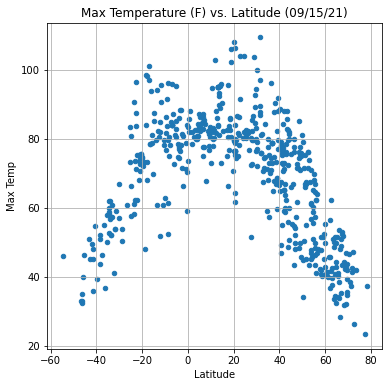

In [96]:

weather_result_df.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True, figsize=(6,6),
              title="Max Temperature (F) vs. Latitude (%s)" % time.strftime("%x"))
#weather_result_df.plot(kind="scatter", x="Max Temp", y="Latitude", grid=True, figsize=(6,6),
              #title="Max Temperature (F) vs. Latitude (%s)" % time.strftime("%x"))
#plt.show()
plt.savefig("../output_data/lat_temp.png")
plt.show()

At the time the data has been populated most of the cities with the highest temperature are located between -20 to 40 latitude. The further away from zero latitude the lower the Maximum Temperature.

## Latitude vs. Humidity Plot

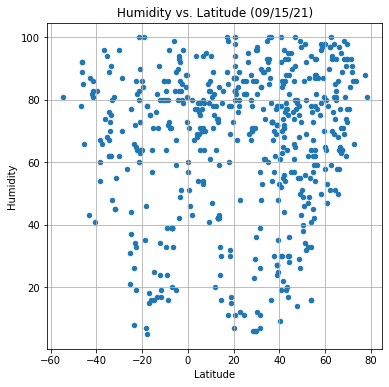

In [97]:
weather_result_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(6,6),
              title="Humidity vs. Latitude (%s)" % time.strftime("%x"))
plt.savefig("../output_data/lat_hum.png")
plt.show()

The variation in Humidity readings are found throughout most Latitudes. The only exceptions appear to be are no readings of Humidity below 40 at latitudes -40 to -60 & 60 to 80.

## Latitude vs. Cloudiness Plot

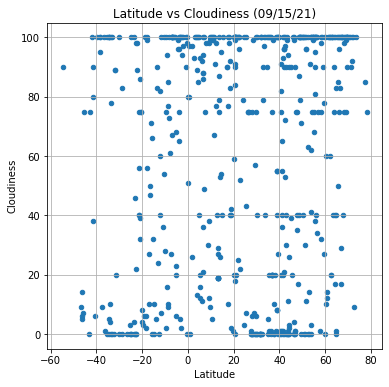

In [98]:
weather_result_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(6,6),
              title="Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("../output_data/lat_cloud.png")
plt.show()

When there is 100% cloudiness these readings are found evenly throughout all latitudes. Cloud cover readings from 80 to 0 however  are effected by the latitude with less cloud cover found the futher away you go from the equator.

## Latitude vs. Wind Speed Plot

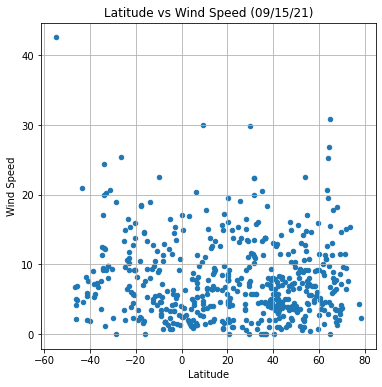

In [99]:
weather_result_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(6,6),
              title="Latitude vs Wind Speed (%s)" % time.strftime("%x"))

plt.savefig("../output_data/lat_wind.png")
plt.show()

Most of the cities that have been randomly picked have a maximum wind speed below 10 mph. 


## Linear Regression

In [66]:
northrn_weather_result_df = weather_result_df.loc[weather_result_df["Latitude"] >= 0]

In [67]:
southrn_weather_result_df = weather_result_df.loc[weather_result_df["Latitude"] < 0]

In [47]:
southrn_weather_result_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nabire,-3.3667,135.4833,76.41,92,100,3.31,ID,1631625356
6,Cape,-36.4130,-71.9028,36.82,74,1,6.69,CL,1631625363
8,Ushuaia,-54.8000,-68.3000,46.02,81,90,42.57,AR,1631625366
12,Rikitea,-23.1203,-134.9692,73.45,72,46,10.13,PF,1631625371
13,Port,-7.0349,29.7638,84.04,39,100,1.66,CD,1631625373


In [69]:
northrn_weather_result_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Capaci,38.1711,13.2393,90.52,62,20,1.99,IT,1631625357
2,San,13.3034,-4.8956,94.91,42,19,6.46,ML,1631625359
3,Pascagoula,30.3658,-88.5561,77.05,96,40,5.75,US,1631625360
4,Lompoc,34.6391,-120.4579,59.09,99,90,0.00,US,1631625361
5,Bam,29.1060,58.3570,92.68,6,0,10.98,IR,1631625362


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7881028397629792


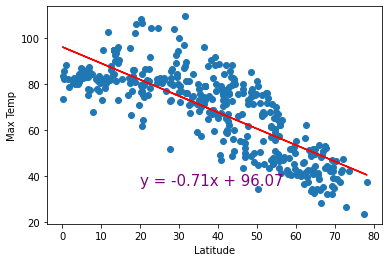

In [103]:

x_values = northrn_weather_result_df["Latitude"]
y_values = northrn_weather_result_df["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {(correlation[0])}")
plt.show()

It has a negative correlation. Zero latitude have higher Max Temperature, and as the latitude increases the Max Temperatures decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
southrn_weather_result_df

The r-value is 0.7488991903235461


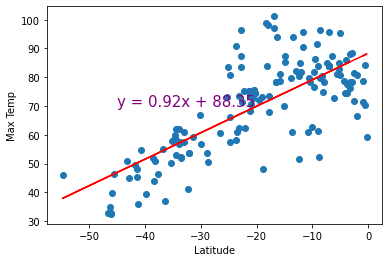

In [105]:
x_values = southrn_weather_result_df["Latitude"]
y_values = southrn_weather_result_df["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,70),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {(correlation[0])}")
plt.show()

If the northern hemisphere has a negative correlation the southern hemisphere has a positive correlation between latitude and Max Temp of the cities. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.12106863251173018


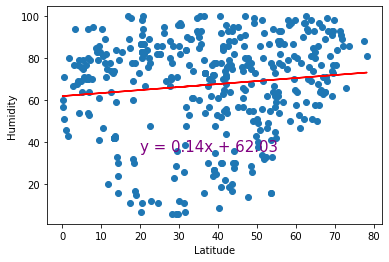

In [58]:
x_values = northrn_weather_result_df["Latitude"]
y_values = northrn_weather_result_df["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {(correlation[0])}")
plt.show()

Data is distributed all over the place and we can tell that 
correlation is too small and we can see that not much cities are near the line.Where humidity readings of 40 and below are found further from the line. The r-value is only .12


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.10053150864642761


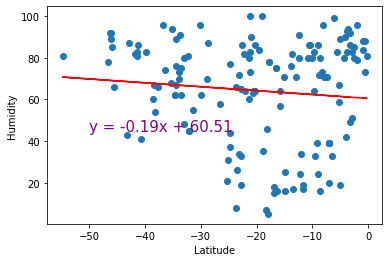

In [108]:
x_values = southrn_weather_result_df["Latitude"]
y_values = southrn_weather_result_df["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {(correlation[0])}")
plt.show()

You can tell by the direction of the line, the r-value is negative. Similar to Northern Hemisphere(Humidity vs Latitude Linear) the data is distributed all over the place and we can tell that 
correlation is too small and we can see that not much cities are near the line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0882458462305009


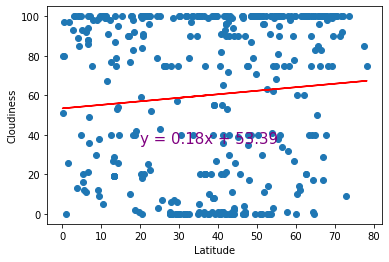

In [60]:
x_values = northrn_weather_result_df["Latitude"]
y_values = northrn_weather_result_df["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {(correlation[0])}")
plt.show()

The r-value is too low.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.20290236622250235


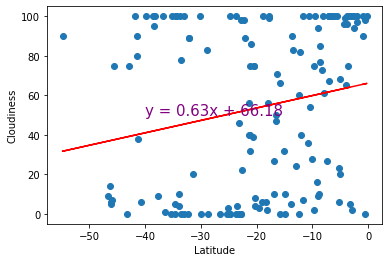

In [61]:
x_values = southrn_weather_result_df["Latitude"]
y_values = southrn_weather_result_df["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {(correlation[0])}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0498937183710388


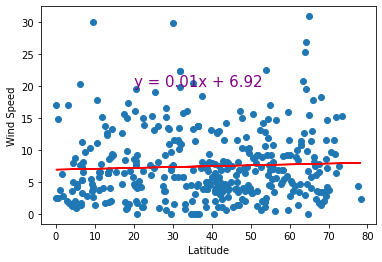

In [85]:
x_values = northrn_weather_result_df["Latitude"]
y_values = northrn_weather_result_df["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {(correlation[0])}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.24278034305345655


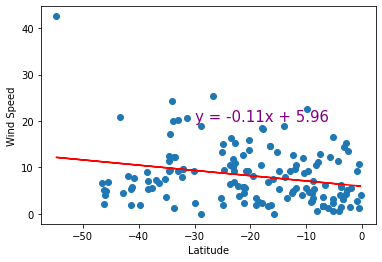

In [64]:
x_values = southrn_weather_result_df["Latitude"]
y_values = southrn_weather_result_df["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {(correlation[0])}")
plt.show()